# The Travelling Salesman

This notebook dives into a network problem rooted in the foundations of collection and visualization.

Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city? This problem can be traced back to the 19th century and is one of the most known problems of optimization. Some of the direct applications of this problem are:

*   Warehouse picking
*   Vehicle routing problems
*   Logistics
*   Planning and scheduling

<img src="https://miro.medium.com/max/992/1*3Ct_bqpIsDVnMEJh6R29Hw.png" width=500>

# Metaheuristics -> Evolutionary Algorithms -> Genetic Algorithm

The term metaheuristic describes higher level heuristics that are proposed for the solution a wide range of optimization problems. Recently, many metaheuristics algorithms are successfully being applied for solving intractable problems (In computational theory, intractable problems are problems for which there exist no efficient algorithms to solve them). The appeal of using these algorithms for solving complex problems is that they obtain the best/optimal solutions in an acceptable amount of time. The following image describes some of the current Metaheuristic algorithms:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Metaheuristics_classification.svg/1200px-Metaheuristics_classification.svg.png" width=400>

**Genetic algorithm flowchart**

Genetic Algorithm (GA) is one of the first population-based stochastic algorithm proposed in the history. Similar to other Evolutionary Algorithms, the main operators of GA are selection, crossover, and mutation. The following flowchart shows how GA works:

<img src="https://miro.medium.com/max/1046/1*f7YNgme2E0vv--NyW39B2A.png" width=800>

# Building the problem

## Libraries

In [1]:
# Importing all the libraries that we are going to use for the algorithm
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

# City Class

In [2]:
# The following class will be used to create a list of 
# n different locations which must be visited at least once.
class City:
  """
  This is the generic class used to create all cities. It needs
  two arguments to work:
  x (float) -> Position in the x axis
  y (float) -> Position in the y axis
  """
  def __init__(self, x, y):
    self.x = x # x coordinate for the city
    self.y = y # y coordinate for the city
    
  def distance(self, city):
    # Pithagorean theorem to calculate the distance between two points
    #      ___________________
    # d = √(x₂-x₁)² + (y₂-y₁)²

    xDis = self.x - city.x # self.x is the current city and city.x 
                           # is the x coordinate of the destinantion
    yDis = self.y - city.y # Similar calculation for the y coordinate
    
    # distance calculation using numpy
    return np.sqrt((xDis ** 2) + (yDis ** 2))
    
  def __repr__(self):
    # This special attribute is going to help us to get the current
    # coordinates of each city whenever created or called
    return "(" + str(self.x) + "," + str(self.y) + ")"

In [3]:
# Testing the City class by creating 2 different cities
City_A=City(100,300)
City_B=City(-300,-400)
City_A

(100,300)

In [4]:
# Testing the distance method within the distance class
# The distance from A to B is the same from B to A
City_A.distance(City_B), City_B.distance(City_A) 

(806.2257748298549, 806.2257748298549)

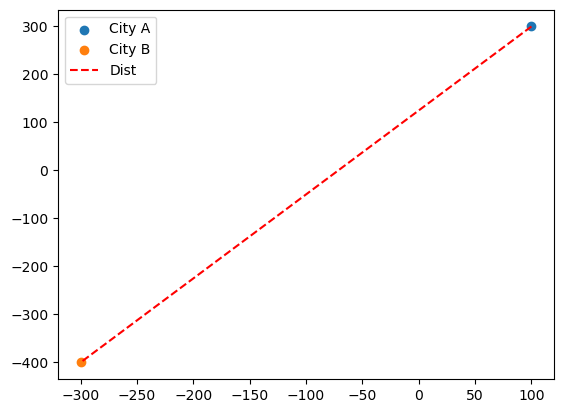

In [5]:
# Creating a plot that shows the two cities and their distance
plt.scatter(x=City_A.x, y=City_A.y, label="City A")   # Blue point
plt.scatter(x=City_B.x, y=City_B.y, label="City B")   # Orange point
plt.plot([City_A.x,City_B.x],
         [City_A.y,City_B.y],
         linestyle="--", color="Red", label="Dist") # Dashed line connecting both cities
plt.legend()
plt.show()

# City list creation

In [6]:
# The following function is going to help us to create
# multiple cities within a range of x and y coordinates:
def city_locations(n_cities, 
                   x_min_coord, x_max_coord, 
                   y_min_coord, y_max_coord,
                   my_seed=10):
  # Numpy seed allow us to have the same random numbers everytime
  np.random.seed(my_seed)
  # We create an empty list to store all the cities that the 
  # travelling salesman has to visit
  route=[]
  # For-loop to create each city by using the City class
  for i in range(1, n_cities+1):
    # Randomly calculating the x and y coordinates of each city
    x=np.random.randint(x_min_coord, x_max_coord)
    y=np.random.randint(y_min_coord, y_max_coord)
    # Converting text into a variable name by using the globals operator
    # and using that variable to create a new City object
    # Object = Class(args)
    globals()["City_"+str(i)] = City(x,y)
    # Adding the new generated object to the list by using the append method
    route.append(globals()["City_"+str(i)])
  return route

In [7]:
test=city_locations(20, -100, 100, -50, 50)
print(test)

[(-91,-35), (-36,-22), (57,-42), (-27,-50), (-60,-14), (15,-34), (0,-39), (-46,38), (7,12), (-67,22), (0,28), (77,1), (-46,27), (97,-37), (53,-37), (-8,36), (-70,-20), (-11,-38), (-35,-19), (-43,-14)]


To have a better understanding of the complexity of the travelling salesman problem, we will start by calculating all the distances between each city and the rest of the cities ($n$). In other words, we can calculate the distance from:

$City_{\ 1} → City_{\ 2}\ , City_{\ 1} → City_{\ 3}\ , \dots\ , City_{\ 1} → City_{\ n}$. 

The last step can be done by using a for-loop. If we want to do the same for every city, then we have to use a nested for-loop. This is done in the following function:

In [8]:
# Matrix distance from using all possible combinations between cities
def distance_matrix(route):
  # We start by creating a matrix of zeros, where the number of rows
  # and columns is equal to the total number of cities
  n=len(route)
  matrix=np.zeros((n,n))
  # First for-loop, this loop is going to help us to pick the origin
  for i in range(n):
    X=route[i]
    # Second for-loop, this loop is going to help us to pick the destination
    for j in range(n):
      Y=route[j]
      # We calculate de distance form origin to destination and store the 
      # result on the matrix
      matrix[i][j]=round(X.distance(Y),3)
  # Using list comprehension, we create a list with the name of all of the cities
  names=["City_"+str(i) for i in range(1, n+1)]
  # We create a dataframe with the matrix
  df = pd.DataFrame(data=matrix, index=names, columns=names)
  return df

In [9]:
d_matrix=distance_matrix(test)
d_matrix

,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13,City_14,City_15,City_16,City_17,City_18,City_19,City_20
City_1,0.000,56.515,148.165,65.734,37.443,106.005,91.088,85.755,108.688,61.847,110.680,171.814,76.609,188.011,144.014,109.225,25.807,80.056,58.241,52.393
City_2,56.515,0.000,95.126,29.411,25.298,52.393,39.812,60.828,54.818,53.824,61.612,115.317,50.010,133.843,90.255,64.405,34.059,29.682,3.162,10.630
City_3,148.165,95.126,0.000,84.380,120.304,42.755,57.079,130.419,73.593,139.542,90.272,47.424,123.976,40.311,6.403,101.533,128.891,68.118,94.831,103.846
City_4,65.734,29.411,84.380,0.000,48.836,44.944,29.155,90.028,70.711,82.365,82.541,115.832,79.310,124.680,81.049,88.074,52.431,20.000,32.016,39.395
City_5,37.443,25.298,120.304,48.836,0.000,77.621,65.000,53.852,71.868,36.674,73.239,137.819,43.324,158.676,115.317,72.139,11.662,54.562,25.495,17.000
City_6,106.005,52.393,42.755,44.944,77.621,0.000,15.811,94.366,46.690,99.298,63.789,71.197,86.267,82.055,38.118,73.682,86.145,26.306,52.202,61.351
City_7,91.088,39.812,57.079,29.155,65.000,15.811,0.000,89.694,51.478,90.609,67.000,86.770,80.449,97.021,53.038,75.425,72.533,11.045,40.311,49.739
City_8,85.755,60.828,130.419,90.028,53.852,94.366,89.694,0.000,59.034,26.401,47.074,128.445,11.000,161.474,124.201,38.053,62.769,83.672,58.052,52.086
City_9,108.688,54.818,73.593,70.711,71.868,46.690,51.478,59.034,0.000,74.673,17.464,70.859,55.082,102.474,67.209,28.302,83.385,53.141,52.202,56.356
City_10,61.847,53.824,139.542,82.365,36.674,99.298,90.609,26.401,74.673,0.000,67.268,145.523,21.587,174.290,133.720,60.638,42.107,82.073,52.010,43.267


A better way to observe the previous result is by using a heatmap

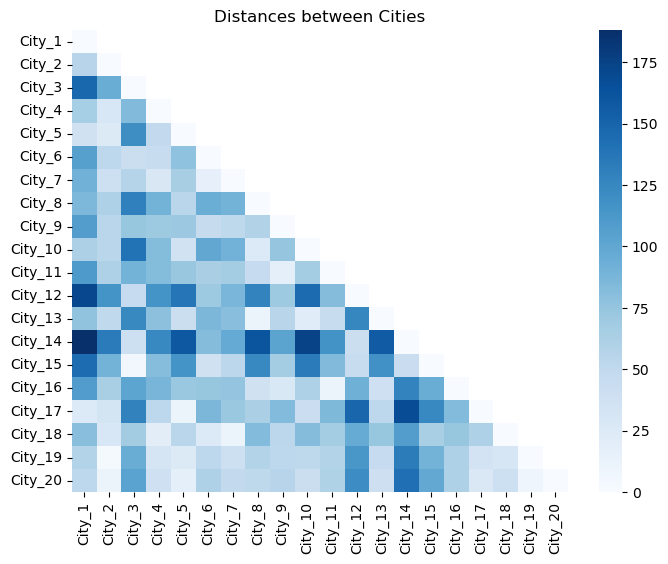

In [10]:
fig, axs = plt.subplots(figsize=(8,6))
sns.heatmap(d_matrix, cmap="Blues", 
            mask=np.triu(d_matrix),
            ax=axs)
plt.title("Distances between Cities")
plt.show()

## Fitness value

The fitness value is a function that tells you how **"fit"** our how **"good"** the solution is with respect to the problem in consideration. For this proble, we will create a class that is going to compute the Fitness value for a given solution. A solution is going to be the order of which the salesman is going to travel.

In [11]:
class Fitness:
  '''
  The Fitness class is going to meassure how good
  is the given route
  route[list]-> It is a list of the order in how
                the cities are going to be visited
  '''
  def __init__(self, route):
    self.route = route
    self.total_distance = self.routeDistance()
    self.fitness = self.routeFitness()
    
  def routeDistance(self):
    # This method is going to acumulate sum of distances from
    # City_A to CityB, then to City_C, then to City_D, etc.
    pathDistance = 0
    # The for-loop is going to pick to cities, fromCity, and toCity
    for i in range(0, len(self.route)):
      fromCity = self.route[i]
      # Since we are picking the next index value for the city destination,
      # we have to make sure that it is possible to pick the next index value
      if i + 1 < len(self.route):
        toCity = self.route[i + 1]
      # if there is no "next" index value, then we will return to the starting city
      # to complete the travelling problem
      else:
        toCity = self.route[0]
      # The calculated distance is going to be acumulated in pathDistance
      pathDistance += fromCity.distance(toCity)
    return pathDistance
    
  def routeFitness(self):
    # Since the path distance increases to infinity, it will be better for the problem
    # to use the inverse of the distance. By doing this, the distance will range from 0 to 1
    # The optimal solution will be the route that provides the highest fintess value
    return 1 / float(self.routeDistance())

In [12]:
# Testing the Fitness class by manually creating multiple Cities
# A -> B -> C -> D
City_A=City(100,300)
City_B=City(-300,-400)
City_C=City(-200,300)
City_D=City(300,-400)
Cities=[City_A, City_B, City_C, City_D]
Fit_test=Fitness(Cities)
print("Cities path:\n")
print(Cities, "\n")
print("Total distance: ", round(Fit_test.total_distance,4))
print("Fitness value:  ", round(Fit_test.fitness,6))

Cities path:

[(100,300), (-300,-400), (-200,300), (300,-400)] 

Total distance:  3101.5761
Fitness value:   0.000322


In [13]:
# Solving the same problem manually
City_A.distance(City_B)+City_B.distance(City_C)+City_C.distance(City_D)+City_D.distance(City_A)

3101.5760716487175

In [14]:
# Using the Fitness class to calculate the total distance of our route with 20 Cities
fitness_test=Fitness(test)
fitness_test.total_distance

1409.7417794153207

In [15]:
fitness_test.fitness

0.0007093497650433132

# Mapping all the cities

In [16]:
# The following function will create a map with all 
# the destinations that must be visited
def mapping_cities(route, user_ax):
  # By using list comprehension, we will collect all the x and y coordinates
  X=np.array([city.x for city in route])
  Y=np.array([city.y for city in route])

  # The following variables are going to be used to set the limits of the graph
  xmin, xmax = X.min(), X.max()
  ymin, ymax = Y.min(), Y.max()

  # The following for-loop will plot every city on the chart and will add a text label to each dot
  # n -> This variable will count each loop of the for-loop
  # city -> This variable is going to take the shape of each element within the variable route
  for n, city in enumerate(route):
    user_ax.plot(city.x,city.y,marker='o', markersize=5, color="green")
    user_ax.text(city.x,city.y, n)

  # The following methods will set the limits of the chart
  user_ax.set_xlim([xmin*1.25, xmax*1.25])
  user_ax.set_ylim([ymin*1.25, ymax*1.25])
  return user_ax

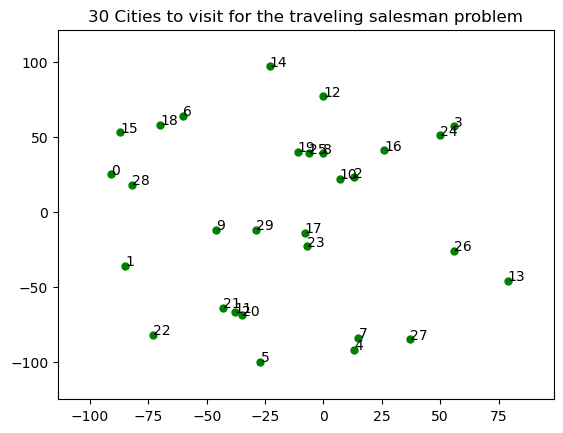

In [17]:
# Creating a new test with n cities
n=30 # Number of cities
test=city_locations(n,
                    -100,100,-100,100)

fig, axs = plt.subplots()
plt.title(str(n) + " Cities to visit for the traveling salesman problem")
mapping_cities(test,axs)
plt.show()

# Mapping a solution

A solution for the travelling salesman problem is any route that visits every city and returns to the starting point. So the first solution to the problem is travelling to each city in the exact same order that they were given from the start.

In [18]:
# This is the first solution:
print(test)

[(-91,25), (-85,-36), (13,23), (56,57), (13,-92), (-27,-100), (-60,64), (15,-84), (0,39), (-46,-12), (7,22), (-38,-67), (0,77), (79,-46), (-23,97), (-87,53), (26,41), (-8,-14), (-70,58), (-11,40), (-35,-69), (-43,-64), (-73,-82), (-7,-23), (50,51), (-6,39), (56,-26), (37,-85), (-82,18), (-29,-12)]


The first solution will serve as a baseline. To better understand this, we will plot the route followed by the travelling salesman on this first solution:

In [19]:
def walked_route(selected_route, user_ax):
  # Calling the previous function to create the maps and the dots
  mapping_cities(selected_route, user_ax)
  X=[city.x for city in selected_route]
  Y=[city.y for city in selected_route]
  # Identifying the starting point
  X.append(X[0])
  Y.append(Y[0])
  # Plotting the lines conecting every city. This will show the route of the travelling salesman
  user_ax.plot(X,Y)
  # Plotting the starting point
  user_ax.plot(X[0],Y[0], marker="x", markersize=5, color="red", markeredgewidth=4)
  return user_ax

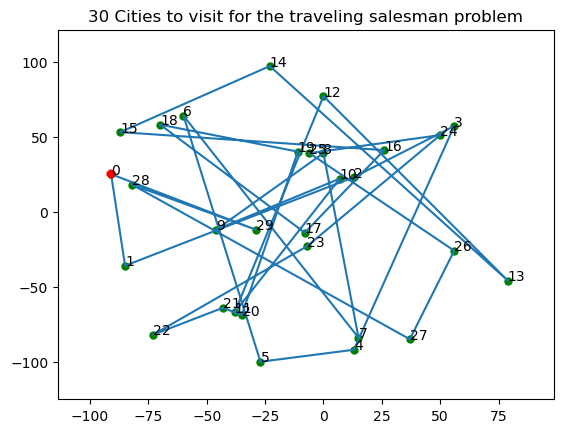

In [20]:
# Testing the previous function
n=30 # Number of cities
test=city_locations(n,
                    -100,100,-100,100)

fig, axs = plt.subplots()
plt.title(str(n) + " Cities to visit for the traveling salesman problem")
walked_route(test,axs)
plt.show()

# Creating a solution for the problem

As mentioned before, the first solution will work as a baseline. The next step is to find a different solution to the problem. In this case it doesn't matter if this new solution is better or worst than the baseline. It just has to be a solution. With that in mind, we will create a function that will create a new solution randomly:

In [21]:
def createRoute(cityList, my_seed=0):
  random.seed(my_seed)
  # The method sample from the library random creates a subset of
  # data values from a given set of values (https://docs.python.org/3/library/random.html)
  # If the size of the subsample is the same as the sample, then the new subsample will
  # be a suffled version of the original sample.
  return random.sample(cityList, len(cityList))

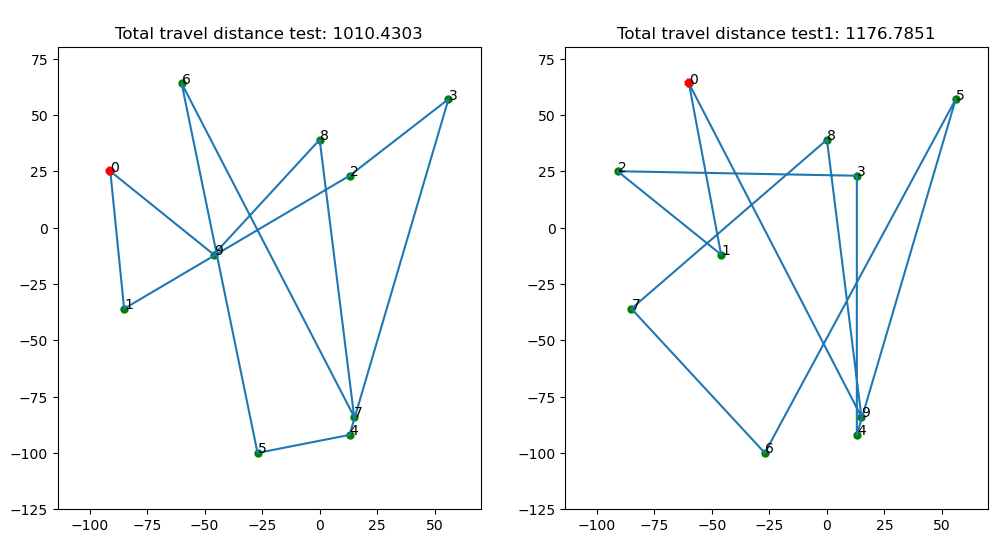

In [22]:
# Small representation of the Salesman problem
cities=10
# Baseline solution
test=city_locations(cities, -100,100,-100,100)

# New solution using the function createRoute()
test1=createRoute(test)

fig, axs= plt.subplots(1,2, figsize=(12,6))
walked_route(test,axs[0])
walked_route(test1,axs[1])
axs[0].set_title("\nTotal travel distance test: {:.4f}".format(Fitness(test).routeDistance()))
axs[1].set_title("\nTotal travel distance test1: {:.4f}".format(Fitness(test1).routeDistance()))
plt.show()

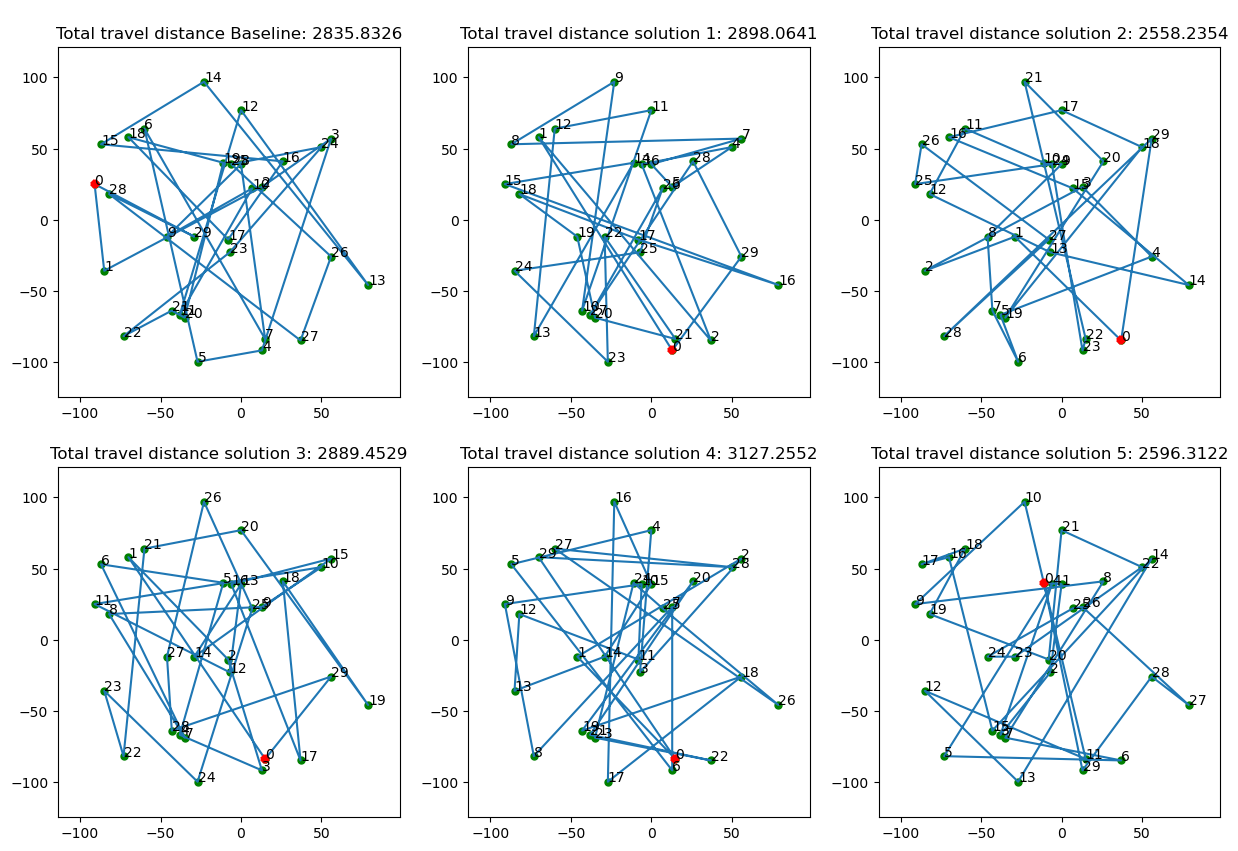

In [23]:
# Comparing Baseline with other 5 solutions
number_cities=30
baseline=city_locations(number_cities,
                    -100,100,-100,100)

fig, axs= plt.subplots(2,3, figsize=(15,10))
walked_route(baseline,axs[0,0])
axs[0,0].set_title("\nTotal travel distance Baseline: {:.4f}".format(Fitness(baseline).routeDistance()))

for n, ax in enumerate(axs.flatten()):
  # Since the first chart is already taken by the baseline, we will skip it
  if n==0:
    continue
  # New solution using the function createRoute()
  new_test=createRoute(baseline, n)
  walked_route(new_test,ax)
  ax.set_title("\nTotal travel distance solution {}: {:.4f}".format(n, Fitness(new_test).routeDistance()))
plt.show()

**Note:** The previous solutions were obtained randomly. These solutions are not the most optimal solutions yet. Nonetheless, this group of solutions will serve as the first generation of the genetic algorithm.

# Genetic Algorithm

## First generation

The genetic algorithm is inspired on how the natural selection process happens in real life. Every new generation is an improvement of the previous generation. Each generation is made of individuals, and this individuals are made of genes. Ideally, the strongest individuals will pass their genes to the following generations. That is the general principle behind the GA.

<img src="https://www.mdpi.com/symmetry/symmetry-12-01758/article_deploy/html/images/symmetry-12-01758-g001.png" width=400>

This is how the analogy of the GA will be used here:

*   GA is made of generations
*   Each Generation is made of a population of individuals
*   Each individual represents a **solution** to the problem
*   Each individual is made of genes (in this problem, they will be the order of each city)



In [24]:
# In our baseline, gene 1 will be (-91,25)
print(baseline)

[(-91,25), (-85,-36), (13,23), (56,57), (13,-92), (-27,-100), (-60,64), (15,-84), (0,39), (-46,-12), (7,22), (-38,-67), (0,77), (79,-46), (-23,97), (-87,53), (26,41), (-8,-14), (-70,58), (-11,40), (-35,-69), (-43,-64), (-73,-82), (-7,-23), (50,51), (-6,39), (56,-26), (37,-85), (-82,18), (-29,-12)]


In [25]:
# By shuffling the order of our original list, we can come up to a new solution
# This is a new solution to our problem
print(createRoute(baseline), 0)

[(37,-85), (0,77), (50,51), (79,-46), (-85,-36), (0,39), (26,41), (-87,53), (-82,18), (-46,-12), (-73,-82), (-38,-67), (-60,64), (-7,-23), (13,-92), (-11,40), (13,23), (-43,-64), (-6,39), (-35,-69), (-23,97), (-29,-12), (56,-26), (15,-84), (-91,25), (-27,-100), (-8,-14), (-70,58), (7,22), (56,57)] 0


In [26]:
# For the current excercise consider a population size of 20
# By using the following function we can create the initial population
def initialPopulation(popSize, cityList):
  '''
  This function is going to create a list of individuals (solutions),
  from our list of cities.
  '''
  population = []
  for i in range(0, popSize):
    population.append(createRoute(cityList, i))
  return population

In [27]:
# Testing an initial population of 5 individuals (solutions)
n=5
example=initialPopulation(n,test)
for i in range(n):
  print(example[i])

[(-60,64), (-46,-12), (-91,25), (13,23), (13,-92), (56,57), (-27,-100), (-85,-36), (0,39), (15,-84)]
[(13,23), (-85,-36), (13,-92), (-91,25), (56,57), (-27,-100), (15,-84), (-46,-12), (0,39), (-60,64)]
[(-91,25), (-85,-36), (0,39), (13,23), (15,-84), (-60,64), (13,-92), (56,57), (-46,-12), (-27,-100)]
[(56,57), (0,39), (13,23), (15,-84), (13,-92), (-46,-12), (-91,25), (-60,64), (-27,-100), (-85,-36)]
[(56,57), (13,-92), (-85,-36), (-27,-100), (-46,-12), (-60,64), (15,-84), (-91,25), (13,23), (0,39)]


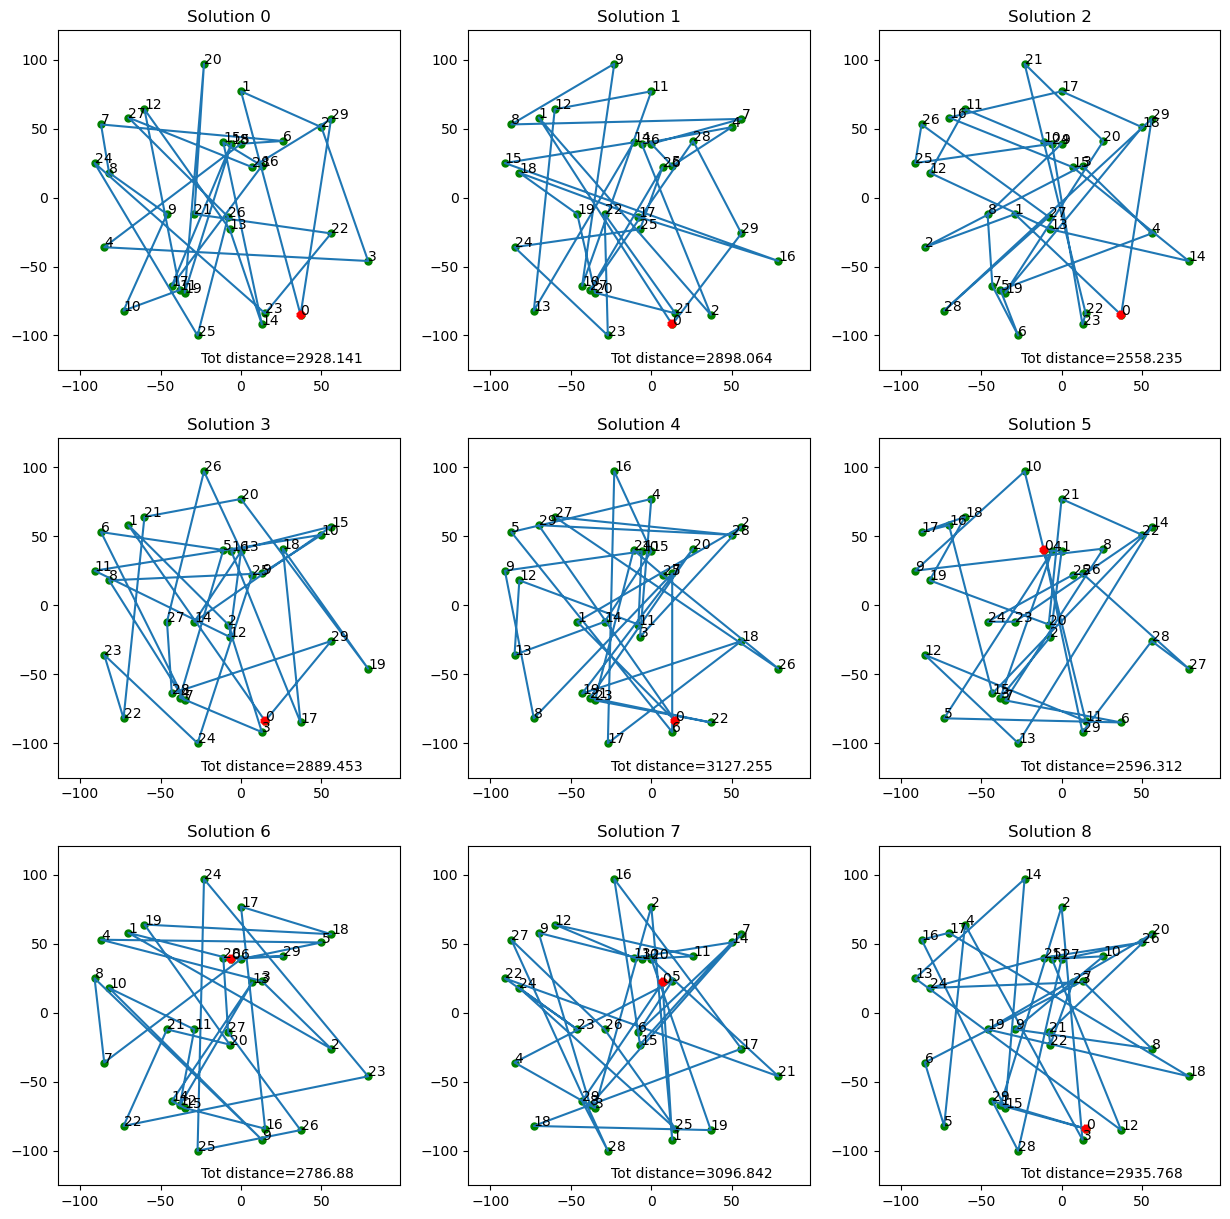

In [28]:
# Mapping the first population with 9 different solutions
ind=9
test_pop=initialPopulation(ind,baseline)
fig, charts= plt.subplots(3,3, figsize=(15,15))
for n, chart in enumerate(charts.flatten()):
  walked_route(test_pop[n],chart)
  chart.text(-25,-120, 
             "Tot distance="+str(round(Fitness(test_pop[n]).total_distance,3)))
  chart.set_title("Solution " + str(n))
plt.show()

## Solution ranking

After building the first group of solutions, it is important to rank the solutions according to their fitness value. The goal is to create a elit group that will help to create the next generation.

In [29]:
def rankRoutes(population):
  '''
  This function is going to rank all of our individuals within
  our population by implementing the Fitness class
  '''
  # Creating an empty DataFrame with a column named Fitness
  fitnessResults = pd.DataFrame(columns=["Fitness"])

  # Using a for-loop to add row by row the Fitness value of each individual
  for i in range(len(population)):
    fitnessResults.loc[i] = round(Fitness(population[i]).routeFitness(),6)
  return  fitnessResults.sort_values("Fitness", ascending=False).reset_index()

In [30]:
rankRoutes(test_pop)

,index,Fitness
0,2,0.000391
1,5,0.000385
2,6,0.000359
3,3,0.000346
4,1,0.000345
5,0,0.000342
6,8,0.000341
7,7,0.000323
8,4,0.000320


## Survival of the fittest

In [31]:
# For the current excercise consider an elite size of 10
def selection(popRanked, eliteSize):
  '''
  This function is going to choose which individuals are going
  to be part of the breeding process to create the next generation
  '''
  # Rule 1: Choosing the top solutions
  selectionResults = popRanked['index'].values.tolist()[:eliteSize]

  # Rule 2: The remaining spots are going to be filled by chance
  for i in range(len(popRanked) - eliteSize):
    num=np.random.randint(0,len(popRanked))
    selectionResults.append(popRanked.iloc[num,0])
  return selectionResults

In [32]:
# Testing the "natural selection" function
selection(rankRoutes(test_pop), 2)

[2, 5, 5, 7, 5, 1, 2, 4, 0]

## Breeding

In [33]:
def matingPool(population, selectionResults):
  '''
  After choosing the individuals that are going to be part of
  the breeding process, it is important to get their corresponding
  route values. This is what this function does.
  '''
  matingpool = []
  for i in range(len(selectionResults)):
    index = selectionResults[i]
    matingpool.append(population[index])
  return matingpool

In [34]:
sel_results=selection(rankRoutes(test_pop), 4)
sel_results

[2, 5, 6, 3, 1, 7, 4, 4, 6]

In [35]:
# Automaticaly getting all the solution routes that are going to
# create the next generation of solutions
pool=matingPool(test_pop, sel_results)
pool

[[(37,-85),
  (-29,-12),
  (-85,-36),
  (13,23),
  (56,-26),
  (-38,-67),
  (-27,-100),
  (-43,-64),
  (-46,-12),
  (0,39),
  (-11,40),
  (-60,64),
  (-82,18),
  (-7,-23),
  (79,-46),
  (7,22),
  (-70,58),
  (0,77),
  (50,51),
  (-35,-69),
  (26,41),
  (-23,97),
  (15,-84),
  (13,-92),
  (-6,39),
  (-91,25),
  (-87,53),
  (-8,-14),
  (-73,-82),
  (56,57)],
 [(-11,40),
  (0,39),
  (-7,-23),
  (-38,-67),
  (-6,39),
  (-73,-82),
  (37,-85),
  (-35,-69),
  (26,41),
  (-91,25),
  (-23,97),
  (15,-84),
  (-85,-36),
  (-27,-100),
  (56,57),
  (-43,-64),
  (-70,58),
  (-87,53),
  (-60,64),
  (-82,18),
  (-8,-14),
  (0,77),
  (50,51),
  (-29,-12),
  (-46,-12),
  (7,22),
  (13,23),
  (79,-46),
  (56,-26),
  (13,-92)],
 [(-6,39),
  (-70,58),
  (56,-26),
  (13,23),
  (-87,53),
  (50,51),
  (0,39),
  (-85,-36),
  (-91,25),
  (13,-92),
  (-82,18),
  (-29,-12),
  (-38,-67),
  (7,22),
  (-43,-64),
  (-35,-69),
  (15,-84),
  (0,77),
  (56,57),
  (-60,64),
  (-7,-23),
  (-46,-12),
  (-73,-82),
  (79,-46

In [36]:
def breed(parent1, parent2):
  '''
  This function is going to create a new solution from the existing
  ones. It will pick a subset of genes randomly from parent1 and filled
  the remaining spots of the offspring with the genes of parent2. The 
  genes of parent2 are going to be different to the ones that were
  chosen first from parent1.
  '''
  child = []    # The offspring (new solution)
  childP1 = []  # Genes comming from parent1
  childP2 = []  # Genes comming from parent2
   
  # Random selection of the starting and ending points of parent number 1 genes
  index1 = np.random.randint(0, len(parent1)-1)
  index2 = np.random.randint(0, len(parent1)-1)
  
  # Determining which index is the starting point and which one is the 
  # ending point (Gene -> City location)
  startGene = min(index1, index2)
  endGene = max(index1, index2)
    
  # Slicing first parent by using the starting and ending Genes selected
  childP1=parent1[startGene:endGene]
    
  # The remaining values will come from parent2; only those values that 
  # hasn´t been selected yet from parent 1 will be chosen in the order 
  # that parent2 has.

  # This can be done by using list comprehension
  # childP2 = [gene for gene in parent2 if gene not in childP1]
  
  # The same can be achieve by using a traditional for-loop
  # Looping over all cities on parent2
  for gene in parent2:
    # Checking if the city is already part from what it is being passed
    # from parent1, if not, then it is going to be passed from parent2
    if gene not in childP1:
      childP2.append(gene)
    
  # A new solution is born
  child = childP1 + childP2
  return child

In [37]:
# Testing breeding function using solutions that we got from the
# MatingPool function
print(pool[0])  # Parent1
print(pool[-1]) # Parent2
print("-"*300)
print(breed(pool[0],pool[-1])) # Offspring

[(37,-85), (-29,-12), (-85,-36), (13,23), (56,-26), (-38,-67), (-27,-100), (-43,-64), (-46,-12), (0,39), (-11,40), (-60,64), (-82,18), (-7,-23), (79,-46), (7,22), (-70,58), (0,77), (50,51), (-35,-69), (26,41), (-23,97), (15,-84), (13,-92), (-6,39), (-91,25), (-87,53), (-8,-14), (-73,-82), (56,57)]
[(-6,39), (-70,58), (56,-26), (13,23), (-87,53), (50,51), (0,39), (-85,-36), (-91,25), (13,-92), (-82,18), (-29,-12), (-38,-67), (7,22), (-43,-64), (-35,-69), (15,-84), (0,77), (56,57), (-60,64), (-7,-23), (-46,-12), (-73,-82), (79,-46), (-23,97), (-27,-100), (37,-85), (-8,-14), (-11,40), (26,41)]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
[(-82,18), (-7,-23), (79,-46), (7,22), (-70,58), (0,77), (50,51), (-35,-69), (26,41), (-23,97), (-6,3

Now that we can create new solutions, the next step is to breed a new population.

In [38]:
# Function to create a new population
def breedPopulation(matingpool, eliteSize):
  # Empty list that is going to be filled with the new individuals
  children = [] 
  # length is the number of remaining spots of the new generation after substracting the elite size
  length = len(matingpool) - eliteSize
  # pool of routes to be used
  pool = random.sample(matingpool, len(matingpool))
    
  # Members from the elite size will become automatically solutions
  # for the next generation
  for i in range(0,eliteSize):
    children.append(matingpool[i])
    
  # The remaining spots for the following generation will be filled
  # using the breed function
  for i in range(0, length):
    child = breed(pool[i], pool[len(matingpool)-i-1])
    children.append(child)
  return children

In [39]:
# Testing breedPopulation function to create a new generation of 
# individuals (solutions)
print(breedPopulation(pool, 4))

[[(37,-85), (-29,-12), (-85,-36), (13,23), (56,-26), (-38,-67), (-27,-100), (-43,-64), (-46,-12), (0,39), (-11,40), (-60,64), (-82,18), (-7,-23), (79,-46), (7,22), (-70,58), (0,77), (50,51), (-35,-69), (26,41), (-23,97), (15,-84), (13,-92), (-6,39), (-91,25), (-87,53), (-8,-14), (-73,-82), (56,57)], [(-11,40), (0,39), (-7,-23), (-38,-67), (-6,39), (-73,-82), (37,-85), (-35,-69), (26,41), (-91,25), (-23,97), (15,-84), (-85,-36), (-27,-100), (56,57), (-43,-64), (-70,58), (-87,53), (-60,64), (-82,18), (-8,-14), (0,77), (50,51), (-29,-12), (-46,-12), (7,22), (13,23), (79,-46), (56,-26), (13,-92)], [(-6,39), (-70,58), (56,-26), (13,23), (-87,53), (50,51), (0,39), (-85,-36), (-91,25), (13,-92), (-82,18), (-29,-12), (-38,-67), (7,22), (-43,-64), (-35,-69), (15,-84), (0,77), (56,57), (-60,64), (-7,-23), (-46,-12), (-73,-82), (79,-46), (-23,97), (-27,-100), (37,-85), (-8,-14), (-11,40), (26,41)], [(15,-84), (-70,58), (-8,-14), (13,-92), (-38,-67), (-11,40), (-87,53), (-35,-69), (-82,18), (13,23

## Mutation

During the optimization process it is possible to fall in what is known as a local minimum. The word "local" is used to distinguish these from the global minimum of the function, which is the single lowest value of the function. 

<img src="https://scipy-lectures.org/_images/sphx_glr_plot_2d_minimization_002.png" width=400>

One way to avoid falling on a local minimum is by mutation. This process is done by chance, and it happens at a very low rate. Mutation has the following characteristics:

*   Mutation is random (It is not going to happend on every solution)
*   For this problem **Mutation** implies changing the current position of a city in our path

In [40]:
# This function will provide the randomness of mutation 
# in one of the possible routes. 

def mutate(individual, mutationRate):
  # Checking for every city if it will mutate or not
  for possible_swapped in range(len(individual)):
    # If the random value generated is lower than the mutation rate,
    # then the mutation process will begin.
    if(np.random.rand() < mutationRate):
      # The selected city will be swapped with other city position
      # within the solution
      swap_index = np.random.randint(0, len(individual)-1)
      city1 = individual[possible_swapped]
      city2 = individual[swap_index]
            
      # Swapping process
      individual[possible_swapped] = city2
      individual[swap_index] = city1
  return individual

In [41]:
# Testing mutation function
print(test_pop[8])
print(mutate(test_pop[8],0.01))

[(15,-84), (-38,-67), (0,77), (13,-92), (-60,64), (-73,-82), (-85,-36), (13,23), (56,-26), (-29,-12), (26,41), (-6,39), (37,-85), (-91,25), (-23,97), (-35,-69), (-87,53), (-70,58), (79,-46), (-46,-12), (56,57), (-8,-14), (-7,-23), (7,22), (-82,18), (-11,40), (50,51), (0,39), (-27,-100), (-43,-64)]
[(-6,39), (-38,-67), (0,77), (13,-92), (-60,64), (-73,-82), (-85,-36), (13,23), (56,-26), (-29,-12), (26,41), (15,-84), (37,-85), (-91,25), (-23,97), (-35,-69), (-87,53), (-70,58), (79,-46), (-46,-12), (56,57), (-8,-14), (-7,-23), (7,22), (-82,18), (-11,40), (50,51), (0,39), (-27,-100), (-43,-64)]


In [42]:
# This function will provide the randomness of mutation 
# in the new born generation
def mutatePopulation(population, mutationRate):
  mutatedPop = []
  
  for ind in range(len(population)):
    mutatedInd = mutate(population[ind], mutationRate)
    mutatedPop.append(mutatedInd)
  return mutatedPop

# Putting all together

Now everything is ready to try test the Genetic Algorithm. We will start by setting the baseline

Current path distance: 2479.6394027149695 



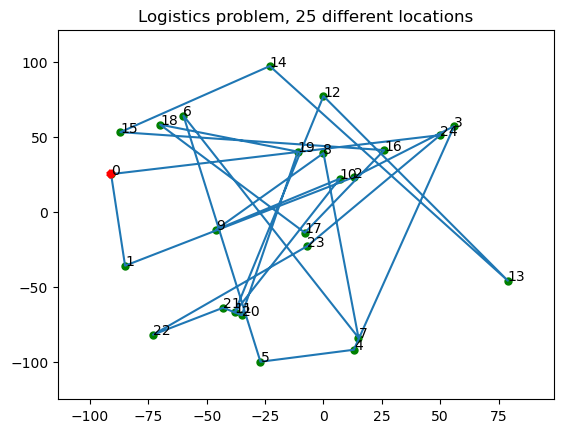

In [43]:
num=25
baseline=city_locations(num,
                    -100,100,-100,100)
fig,axs=plt.subplots()
walked_route(baseline, axs)
plt.title("Logistics problem, {} different locations".format(num))
print("Current path distance:", 
      Fitness(baseline).routeDistance(),
     "\n")
plt.show()

In [44]:
# This function ensembles everything together as part of the breeding process
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [45]:
# Creating the first generation of the algorithm
fst_gen=initialPopulation(20,baseline)
print(fst_gen[0])

[(0,77), (79,-46), (-85,-36), (0,39), (26,41), (-87,53), (50,51), (-46,-12), (-11,40), (-38,-67), (-8,-14), (56,57), (-43,-64), (13,23), (13,-92), (-35,-69), (-73,-82), (7,22), (15,-84), (-27,-100), (-60,64), (-70,58), (-7,-23), (-91,25), (-23,97)]


In [46]:
# All following generations will be created using the function nextGeneration
snd_pop=nextGeneration(fst_gen, 20, 0.01)
print(snd_pop[0])

[(0,39), (-46,-12), (-43,-64), (-73,-82), (-27,-100), (15,-84), (13,-92), (-11,40), (-35,-69), (-70,58), (-85,-36), (50,51), (56,57), (-38,-67), (-87,53), (-91,25), (-60,64), (13,23), (79,-46), (26,41), (7,22), (-7,-23), (-23,97), (0,77), (-8,-14)]


In [47]:
# This function provides the for loop needed to create several generations

def geneticAlgorithm(baseline, popSize, eliteSize, mutationRate, generations):
  '''
  1. baseline = (list) List of all the cities that have to be visited
  2. popSize = (int) Number of solutions to be considered as part of each generation
  3. eliteSize = (int) Number of chosen solutions according to their fitness value
  4. mutationRate = (float) Floating point value indicating the percentage of genes to be swapped within a solution
  5. generations = (int) Number of generations to create in order to achieve convergence
  '''
  # The following two lines will create the first generation and will give some info about it
  pop = initialPopulation(popSize, baseline)
  print("Initial distance: " + str(1 / rankRoutes(pop).iloc[0,1]))
  # The following lines will keep track on how well is each generation performing
  # It will store the best fitness value of each generation, starting with the baseline
  progress = {"Gen":[],
                "Route":[],
                "Fitness":[]}
  progress["Gen"].append(0)
  progress["Route"].append(matingPool(pop, selection(rankRoutes(test_pop), eliteSize))[0])
  progress["Fitness"].append(float(1 / rankRoutes(pop).iloc[0, 1]))
  
  # This for loop will iterate over the number of generations that our algorithm will use
  for i in range(1, generations):
      pop = nextGeneration(pop, eliteSize, mutationRate)
      progress["Gen"].append(i)
      progress["Route"].append(matingPool(pop, selection(rankRoutes(test_pop), eliteSize))[0])
      progress["Fitness"].append(1 / rankRoutes(pop).iloc[0, 1])
    
  print("Final distance: " + str(1 / rankRoutes(pop).iloc[0, 1]))
  bestRouteIndex = rankRoutes(pop).iloc[0, 0]
  bestRoute = pop[bestRouteIndex]
  return bestRoute, progress

In [48]:
# Testing the algorithm (Runtime: 3 min 31 seg)
# 1. Creating a list of cities to visit
number_cities=25
problem=city_locations(number_cities, -100,100,-100,100, 888)

# 2. Optimizing the route of the problem by using the algorithm
solution, progress = geneticAlgorithm(problem, 100, 20, 0.01, 500)

Initial distance: 1742.1602787456447
Final distance: 860.5851979345955


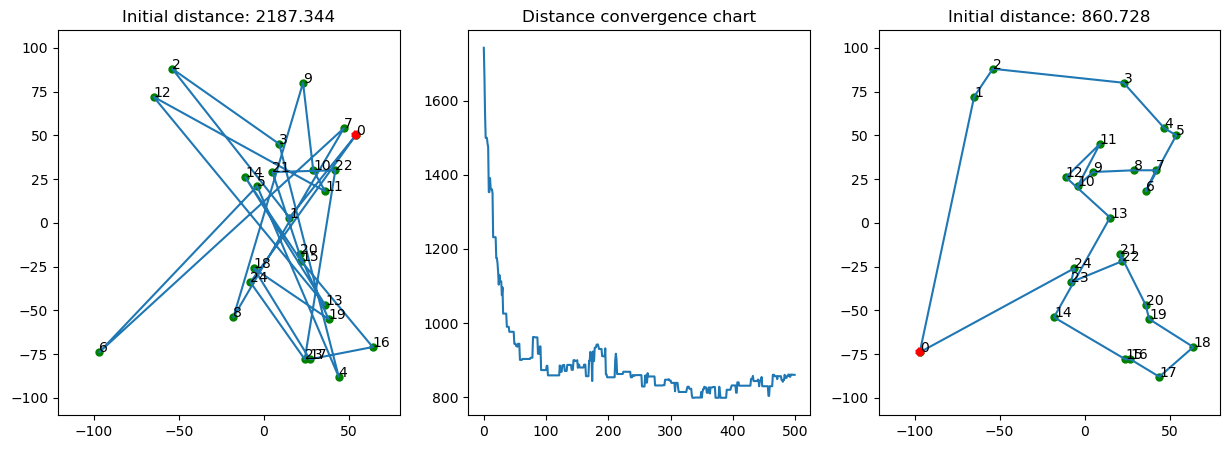

In [49]:
fig,axs=plt.subplots(1,3, figsize=(15,5))
# First chart is the baseline
walked_route(problem, axs[0])
axs[0].set_title("Initial distance: {}".format(
    round(Fitness(problem).routeDistance(),3)))

# Second chart is the progress of the algorithm
axs[1].plot(range(0,len(progress["Fitness"])), progress["Fitness"])
axs[1].set_title("Distance convergence chart")

# Third chart is the last solution obtained
walked_route(solution, axs[2])
axs[2].set_title("Initial distance: {}".format(
    round(Fitness(solution).routeDistance(),3)))
plt.show()

Initial distance: 1742.1602787456447
Final distance: 769.8229407236336


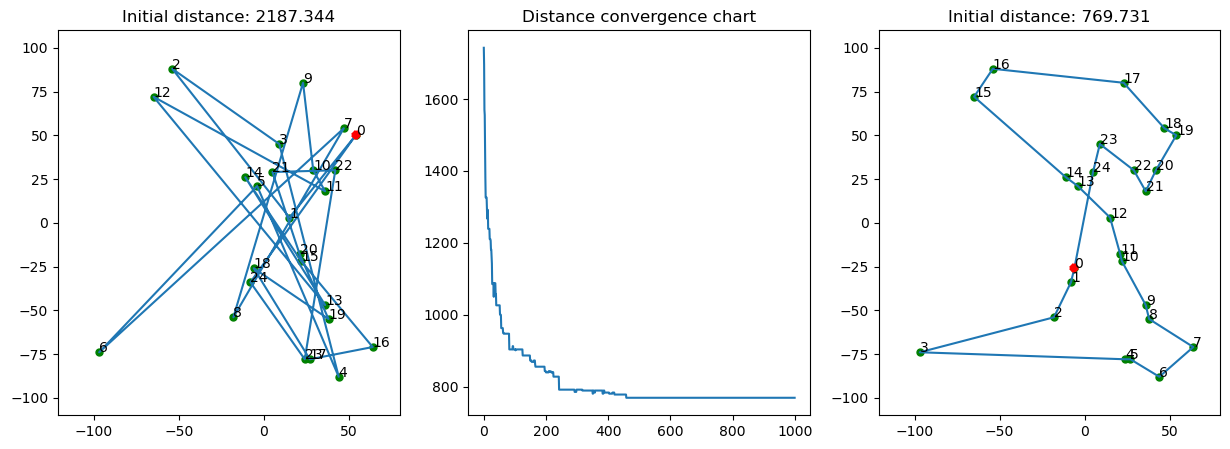

In [50]:
# Trying with a smaller mutation rate and more generations (23 min 31 s)
solution, progress = geneticAlgorithm(problem, 100, 15, 0.005, 1000)
fig,axs=plt.subplots(1,3, figsize=(15,5))
walked_route(problem, axs[0])
axs[0].set_title("Initial distance: {}".format(
    round(Fitness(problem).routeDistance(),3)))
axs[1].plot(range(0,len(progress["Fitness"])), progress["Fitness"])
axs[1].set_title("Distance convergence chart")
walked_route(solution, axs[2])
axs[2].set_title("Initial distance: {}".format(
    round(Fitness(solution).routeDistance(),3)))
plt.show()